# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
H_0 = the new email template has a response rate less than or equal to the current email response rate
H_0 = response_rate <=  0.05

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
H_1 = the new email template has a greater response time than the current email template.
H_1 = response rate > 0.05

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stat
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt



In [12]:
#calculate the effect size 
alpha = 0.05
#power 
power = 0.8
#beta 
beta  = 1 - power
#std
std = 0.0475
#response rate one
p1 = 0.05
#response rate  to be increased to 0.05 + 0.01
p2 = 0.06
#get the pooled variance
pooled_variance = p1 *(1- p1) + p2 *(1- p2)
#calculate the effect size
effect_size = (p2 - p1)/np.sqrt(pooled_variance)

# Calculate the required sample size
power_analysis = TTestIndPower()
#use the power analysis to get the sample size
sample_size = power_analysis.solve_power(effect_size= effect_size,alpha= alpha, power= power,ratio= 1, alternative='larger')

print(round(sample_size))


12848


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

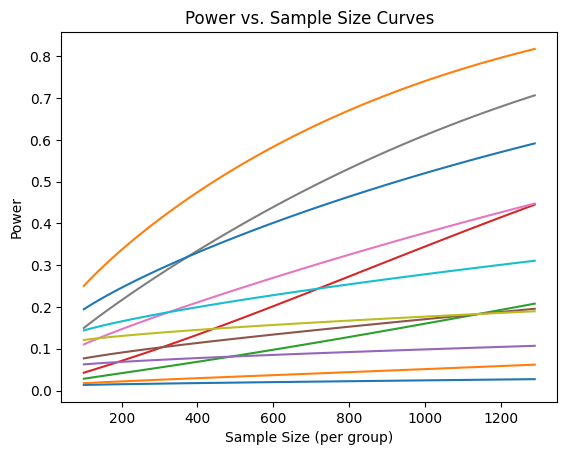

In [22]:
#Your code; plot power curves for the various alpha and effect size combinations
#define the parameters
alphas =[0.01,0.05,0.1]
#response rate differences
rate_differences = [0.005, 0.01, 0.02, 0.03]
#sample size 
sample_sizes = np.arange(100,1300,10)
#loop through the aphas
for alpha in alphas:
    #loop through the rate_differences
    for diff in rate_differences:
        #calculate the new response rate
        new_p2 = p1 + diff
        #calculate the new std for that difference
        std = np.sqrt(p1 *(1 - p1) + new_p2 * (1 - new_p2))
        #calculate the new effect size
        effect_size = diff/std
        #get the power 
        powers = [power_analysis.power(effect_size=effect_size, nobs1=n, alpha=alpha, ratio=1.0, alternative='larger') for n in sample_sizes]
        # Plot power vs. sample size
        plt.plot(sample_sizes, powers, label=f'α={alpha}, Δ={diff}')
        
        
        

# Customize the plot
plt.title('Power vs. Sample Size Curves')
plt.xlabel('Sample Size (per group)')
plt.ylabel('Power')
plt.axhline(y=power, color='gray', linestyle='--', label=f'Desired Power ({power})')
plt.legend(title='Parameters')
plt.grid(True)
plt.tight_layout()
plt.show()



## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.